In [3]:
import pandas as pd

import decomposition
import potential_data
import mag
import fit
import scaler
import plots

pd.options.mode.chained_assignment = None

In [7]:
#original potential and abelian potential depending on mag fixation
def abelian_mag(beta, size, fit_range, sa_steps, sa_short):
    path = f'/home/ilya/soft/lattice/observables/result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/{size}/beta{beta}'
    r0 = scaler.get_r0(beta)
    paths = []
    for i in range(len(sa_steps)):
        path1 = {'original': {'path': f'{path}/HYP0_APE_alpha=0.5/potential_original.csv', 'parameters': {'name': 'SU3'}},
                'monopole': {'path': f'{path}/HYP0_APE_alpha=0.5/{sa_steps[i]}/potential_abelian.csv', 'parameters': {'name': f'mon_{sa_short[i]}'}, 'constraints': {'T': (fit_range[1]-7, fit_range[1]-7)}}}
        paths.append(path1)
    fit_range = tuple([r0*x for x in fit_range])
    data_mag = []
    for path in paths:
        data = potential_data.DataDecomposition(path)
        data.fit_original_T((2, 8))
        data.scale_potentials(r0)
        data.df = data.df.loc[data.df['potential_type'] != 'monopoless']
        data.df = data.df.drop('T', axis = 1)
        data_mag.append(data.df)
    for i in range(1, len(data_mag)):
        data_mag[i] = data_mag[i].loc[data_mag[i]['potential_type'] != 'original']
    data_mag = pd.concat(data_mag)
    image_path = '../../images/potential/abelian_mag/su3/gluodynamics'
    image_name = f'abelian_mag_beta{beta}'
    image_name = image_name.replace('.', 'p')
    plots.plot_potential_single(data_mag, 'r/a', 'aV(r)', 'err', 'name', r'$r/r_{0}$', r'$r_{0}V(r)$', r'abelian dominance $\beta=$' + f'{beta}', image_path, image_name, True)

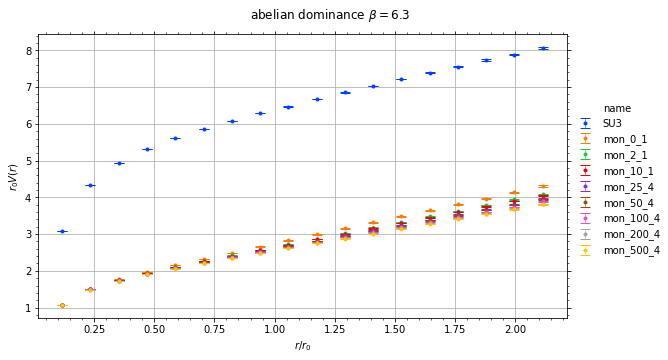

../../images/potential/abelian_mag/su3/gluodynamics/abelian_mag_beta6p3


In [8]:
sa_steps = ['steps_0/copies=1', 'steps_2/copies=1', 'steps_10/copies=1', 'steps_25/copies=4', 'steps_50/copies=4', 'steps_100/copies=4', 'steps_200/copies=4', 'steps_500/copies=4']
sa_short = ['0_1', '2_1', '10_1', '25_4', '50_4', '100_4', '200_4', '500_4']
abelian_mag(6.3, '36^4', (2, 18), sa_steps, sa_short)

In [10]:
# dependence of abelian component on MAG fixation for some distance
show_plot = True
x_name = 'functional'
hue = None
y_name = 'aV(r)'
err_name = 'err'
groupby = []
beta1 = 'beta6p0'
beta = 6.0
r_max = 12
T_max = 12
path = f'/home/ilya/soft/lattice/observables/result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0'
constraints = {'r/a': (1, r_max), 'T': (1, T_max)}
sa_steps = ['steps_0/copies=1', 'steps_2/copies=1', 'steps_10/copies=1', 'steps_25/copies=4', 'steps_50/copies=4',
            'steps_100/copies=4', 'steps_200/copies=4', 'steps_500/copies=4', 'steps_1000/copies=4', 'steps_2000/copies=4']
sa_short = ['0_1', '2_1', '10_1', '25_4', '50_4', '100_4', '200_4', '500_4', '1000_4', '2000_4']
paths = []
# for sa in sa_steps:
for i in range(len(sa_steps)):
    path1 = {'path' : f'{path}/HYP0_APE_alpha=0.5/{sa_steps[i]}/potential_abelian.csv', 'parameters': {'mag_step': sa_short[i]}, 'constraints': {'T': (8, 8), 'r/a': (4, 4)}}
    paths.append(path1)
r0 = scaler.get_r0(beta)
fit_range = (2, r_max)
y_lims = (-1, 8)
# remove_from_plot = ['monopole', 'monopoless']
remove_from_plot = []
make_sum = True
image_path = f'../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0'
image_name = f'potential_abelian_mag_r=4'
path_functional = '../../data/mag/functional/su3/gluodynamics/24^4/beta6.0'
paths_functional = [(f'{path_functional}/steps_0/copies=1', '0_1', 0.5), (f'{path_functional}/steps_2/copies=1', '2_1', 2),
         (f'{path_functional}/steps_10/copies=1', '10_1', 10), (f'{path_functional}/steps_25/copies=4', '25_4', 25),
         (f'{path_functional}/steps_50/copies=4', '50_4', 50), (f'{path_functional}/steps_100/copies=4', '100_4', 100),
         (f'{path_functional}/steps_200/copies=4', '200_4', 200), (f'{path_functional}/steps_500/copies=4', '500_4', 500),
         (f'{path_functional}/steps_1000/copies=4', '1000_4', 1000), (f'{path_functional}/steps_2000/copies=4', '2000_4', 2000)]
data_functional = mag.read_functional(paths_functional, 1, 5000, True, 4)
data_functional['copy'] = data_functional['copy'].apply(pd.to_numeric)
data_functional = mag.functional_average_max(data_functional)
print(data_functional)
data = potential_data.get_potantial_data(paths)
data = data.merge(data_functional, left_on='mag_step', right_on='type')
        #   .reindex(columns=['id', 'store', 'address', 'warehouse']))
data = data.sort_values(by=['functional'])
print(data)
plots.make_plots_single(data, x_name, y_name, hue, groupby, '$r/a$', '$aV(r)$', 'abelian potential', image_path, image_name, show_plot, err=err_name)

KeyboardInterrupt: 

        num    type  functional
0         1     0_1    0.821593
1         1  1000_4    0.822769
2         1   100_4    0.822814
3         1    10_1    0.822230
4         1  2000_4    0.822793
...     ...     ...         ...
49650  5000   200_4    0.822484
49651  5000    25_4    0.822170
49652  5000     2_1    0.822081
49653  5000   500_4    0.822518
49654  5000    50_4    0.822389

[49655 rows x 3 columns]
     type  functional       std
0     0_1    0.821504  0.000004
1  1000_4    0.822843  0.000003
2   100_4    0.822712  0.000003
3    10_1    0.822460  0.000003
4  2000_4    0.822835  0.000003
5   200_4    0.822777  0.000003
6    25_4    0.822540  0.000003
7     2_1    0.822386  0.000003
8   500_4    0.822832  0.000003
9    50_4    0.822634  0.000003
   T  r/a     aV(r)       err mag_step    type  functional       std
0  8   12  0.737861  0.004679      0_1     0_1    0.821504  0.000004
1  8   12  0.683315  0.003050      2_1     2_1    0.822386  0.000003
2  8   12  0.679645  0.003002  

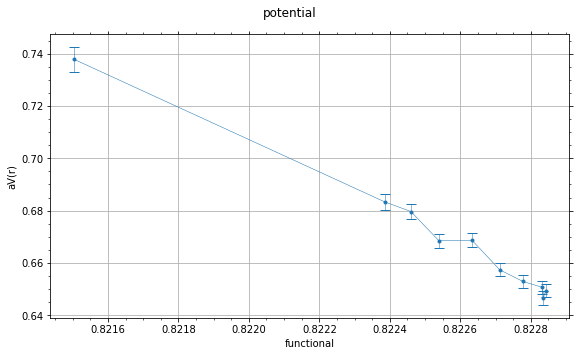

../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0/potential_abelian_mag_r=12


In [5]:
# dependence of abelian component on MAG fixation for some distance
show_plot = True
x_name = 'functional'
hue = None
y_name = 'aV(r)'
err_name = 'err'
groupby = []
beta1 = 'beta6p0'
beta = 6.0
r_max = 12
T_max = 12
path = f'/home/ilya/soft/lattice/observables/result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0'
constraints = {'r/a': (1, r_max), 'T': (1, T_max)}
sa_steps = ['steps_0/copies=1', 'steps_2/copies=1', 'steps_10/copies=1', 'steps_25/copies=4', 'steps_50/copies=4',
            'steps_100/copies=4', 'steps_200/copies=4', 'steps_500/copies=4', 'steps_1000/copies=4', 'steps_2000/copies=4']
sa_short = ['0_1', '2_1', '10_1', '25_4', '50_4', '100_4', '200_4', '500_4', '1000_4', '2000_4']
paths = []
# for sa in sa_steps:
for i in range(len(sa_steps)):
    path1 = {'path' : f'{path}/HYP0_APE_alpha=0.5/{sa_steps[i]}/potential_abelian.csv', 'parameters': {'mag_step': sa_short[i]}, 'constraints': {'T': (8, 8), 'r/a': (12, 12)}}
    paths.append(path1)
r0 = scaler.get_r0(beta)
fit_range = (2, r_max)
y_lims = (-1, 8)
# remove_from_plot = ['monopole', 'monopoless']
remove_from_plot = []
make_sum = True
image_path = f'../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0'
image_name = f'potential_abelian_mag_r=12'
path_functional = '../../data/mag/functional/su3/gluodynamics/24^4/beta6.0'
paths_functional = [(f'{path_functional}/steps_0/copies=1', '0_1', 0.5), (f'{path_functional}/steps_2/copies=1', '2_1', 2),
         (f'{path_functional}/steps_10/copies=1', '10_1', 10), (f'{path_functional}/steps_25/copies=4', '25_4', 25),
         (f'{path_functional}/steps_50/copies=4', '50_4', 50), (f'{path_functional}/steps_100/copies=4', '100_4', 100),
         (f'{path_functional}/steps_200/copies=4', '200_4', 200), (f'{path_functional}/steps_500/copies=4', '500_4', 500),
         (f'{path_functional}/steps_1000/copies=4', '1000_4', 1000), (f'{path_functional}/steps_2000/copies=4', '2000_4', 2000)]
data_functional = mag.read_functional(paths_functional, 1, 5000, True, 4)
data_functional['copy'] = data_functional['copy'].apply(pd.to_numeric)
data_functional = mag.functional_average_max(data_functional)
print(data_functional)
data = potential_data.get_potantial_data(paths)
data = data.merge(data_functional, left_on='mag_step', right_on='type')
data = data.sort_values(by=['functional'])
print(data)
plots.make_plots_single(data, x_name, y_name, hue, groupby, image_path, image_name, show_plot, err=err_name)

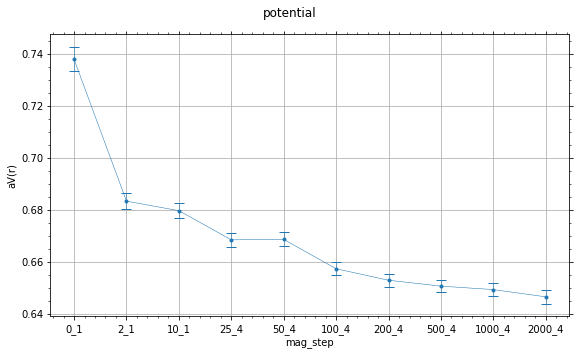

../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0/potential_abelian_steps_r=12


In [6]:
# dependence of abelian component on MAG fixation for some distance
show_plot = True
x_name = 'mag_step'
hue = None
y_name = 'aV(r)'
err_name = 'err'
groupby = []
beta1 = 'beta6p0'
beta = 6.0
r_max = 12
T_max = 12
path = f'/home/ilya/soft/lattice/observables/result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0'
constraints = {'r/a': (1, r_max), 'T': (1, T_max)}
sa_steps = ['steps_0/copies=1', 'steps_2/copies=1', 'steps_10/copies=1', 'steps_25/copies=4', 'steps_50/copies=4',
            'steps_100/copies=4', 'steps_200/copies=4', 'steps_500/copies=4', 'steps_1000/copies=4', 'steps_2000/copies=4']
sa_short = ['0_1', '2_1', '10_1', '25_4', '50_4', '100_4', '200_4', '500_4', '1000_4', '2000_4']
paths = []
# for sa in sa_steps:
for i in range(len(sa_steps)):
    path1 = {'path' : f'{path}/HYP0_APE_alpha=0.5/{sa_steps[i]}/potential_abelian.csv', 'parameters': {'mag_step': sa_short[i]}, 'constraints': {'T': (8, 8), 'r/a': (12, 12)}}
    paths.append(path1)
r0 = scaler.get_r0(beta)
fit_range = (2, r_max)
y_lims = (-1, 8)
# remove_from_plot = ['monopole', 'monopoless']
remove_from_plot = []
make_sum = True
image_path = f'../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0'
image_name = f'potential_abelian_steps_r=12'
# path_functional = '../../data/mag/functional/su3/gluodynamics/24^4/beta6.0'
# paths_functional = [(f'{path_functional}/steps_0/copies=1', '0_1', 0.5), (f'{path_functional}/steps_2/copies=1', '2_1', 2),
#          (f'{path_functional}/steps_10/copies=1', '10_1', 10), (f'{path_functional}/steps_25/copies=4', '25_4', 25),
#          (f'{path_functional}/steps_50/copies=4', '50_4', 50), (f'{path_functional}/steps_100/copies=4', '100_4', 100),
#          (f'{path_functional}/steps_200/copies=4', '200_4', 200), (f'{path_functional}/steps_500/copies=4', '500_4', 500),
#          (f'{path_functional}/steps_1000/copies=4', '1000_4', 1000), (f'{path_functional}/steps_2000/copies=4', '2000_4', 2000)]
# data_functional = mag.read_functional(paths_functional, 1, 5000, True, 4)
# data_functional['copy'] = data_functional['copy'].apply(pd.to_numeric)
# data_functional = mag.functional_average_max(data_functional)
# print(data_functional)
data = potential_data.get_potantial_data(paths)
# data = data.merge(data_functional, left_on='mag_step', right_on='type')
#         #   .reindex(columns=['id', 'store', 'address', 'warehouse']))
# data = data.sort_values(by=['functional'])
# print(data)
plots.make_plots_single(data, x_name, y_name, hue, groupby, image_path, image_name, show_plot, err=err_name)

        num    type  functional
0         1     0_1    0.821593
1         1  1000_4    0.822769
2         1   100_4    0.822814
3         1    10_1    0.822230
4         1  2000_4    0.822793
...     ...     ...         ...
49650  5000   200_4    0.822484
49651  5000    25_4    0.822170
49652  5000     2_1    0.822081
49653  5000   500_4    0.822518
49654  5000    50_4    0.822389

[49655 rows x 3 columns]
          c     c_err     alpha  alpha_err    sigma  sigma_err    chi_sq
0  0.668838  0.059439 -0.338146   0.114068  0.04786   0.007377  0.101934


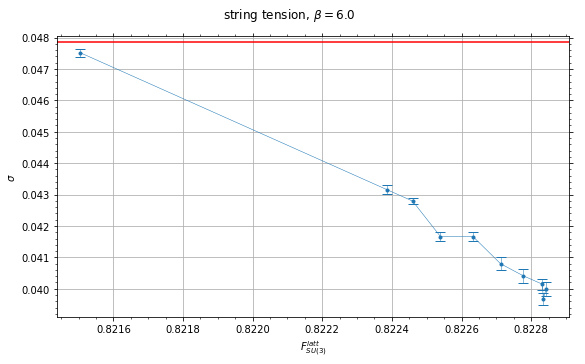

../../images/potential/abelian_dominance/string_tension/su3/gluodynamics/potential_abelian_mag_24^4_beta6p0


In [4]:
# string tension dependence on MAG fixation
show_plot = True
x_name = 'functional'
hue = None
y_name = 'sigma'
err_name = 'sigma_err'
groupby = []
beta1 = 'beta6p0'
beta = 6.0
r_max = 12
T_max = 12
path = f'/home/ilya/soft/lattice/observables/result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0'
constraints = {'r/a': (1, r_max), 'T': (1, T_max)}
sa_steps = ['steps_0/copies=1', 'steps_2/copies=1', 'steps_10/copies=1', 'steps_25/copies=4', 'steps_50/copies=4',
            'steps_100/copies=4', 'steps_200/copies=4', 'steps_500/copies=4', 'steps_1000/copies=4', 'steps_2000/copies=4']
sa_short = ['0_1', '2_1', '10_1', '25_4', '50_4', '100_4', '200_4', '500_4', '1000_4', '2000_4']
paths = []
# for sa in sa_steps:
for i in range(len(sa_steps)):
    path1 = {'path' : f'{path}/HYP0_APE_alpha=0.5/{sa_steps[i]}/potential_abelian.csv', 'parameters': {'mag_step': sa_short[i]}, 'constraints': {'T': (8, 8)}}
    paths.append(path1)
r0 = scaler.get_r0(beta)
fit_range = (4, r_max)
y_lims = (-1, 8)
# remove_from_plot = ['monopole', 'monopoless']
remove_from_plot = []
make_sum = True
image_path = f'../../images/potential/abelian_dominance/string_tension/su3/gluodynamics'
image_name = f'potential_abelian_mag_24^4_beta6p0'
data = potential_data.get_potantial_data(paths)
fit_names = ['c', 'sigma']
fits = data.groupby(['mag_step']).apply(fit.make_fit, fit_range, fit.func_linear, fit_names, 'r/a', 'aV(r)', err_col='err').reset_index()
fits = fits.sort_values(by=['mag_step'])
path_functional = '../../data/mag/functional/su3/gluodynamics/24^4/beta6.0'
paths_functional = [(f'{path_functional}/steps_0/copies=1', '0_1', 0.5), (f'{path_functional}/steps_2/copies=1', '2_1', 2),
         (f'{path_functional}/steps_10/copies=1', '10_1', 10), (f'{path_functional}/steps_25/copies=4', '25_4', 25),
         (f'{path_functional}/steps_50/copies=4', '50_4', 50), (f'{path_functional}/steps_100/copies=4', '100_4', 100),
         (f'{path_functional}/steps_200/copies=4', '200_4', 200), (f'{path_functional}/steps_500/copies=4', '500_4', 500),
         (f'{path_functional}/steps_1000/copies=4', '1000_4', 1000), (f'{path_functional}/steps_2000/copies=4', '2000_4', 2000)]
data_functional = mag.read_functional(paths_functional, 1, 5000, True, 4)
data_functional['copy'] = data_functional['copy'].apply(pd.to_numeric)
data_functional = mag.functional_average_max(data_functional)
fits = fits.merge(data_functional, left_on='mag_step', right_on='type')
fits = fits.sort_values(by=['functional'])
fits['type'] = 'abelian'
# fits = fits['']
path_su3 = [{'path' : f'{path}/HYP0_APE_alpha=0.5/potential_original.csv', 'constraints': {'T': (8, 8)}}]
data_su3 = potential_data.get_potantial_data(path_su3)
data_su3 = fit.make_fit(data_su3, (3, 12), fit.func_quark_potential, ['c', 'alpha', 'sigma'], 'r/a', 'aV(r)', err_col='err')
# data_su3 = fit.make_fit(data_su3, (6, 12), fit.func_linear, ['c', 'sigma'], 'r/a', 'aV(r)', err_col='err')
print(data_su3)
plots.make_plots_single(fits, x_name, y_name, None, groupby, r'$F_{SU(3)}^{latt}$', r'$\sigma$', r'string tension, $\beta=6.0$', image_path, image_name, show_plot, err=err_name, black_line_y=data_su3.loc[:,'sigma'].iloc[0])

        num   type  functional
0         1    0_1    0.839106
1         1  100_4    0.839900
2         1   10_1    0.839711
3         1  200_4    0.839988
4         1   25_4    0.839759
...     ...    ...         ...
16256  2135   10_1    0.839914
16257  2135  200_4    0.840094
16258  2135   25_4    0.839886
16259  2135    2_1    0.839844
16260  2135   50_4    0.839962

[16261 rows x 3 columns]
          c     c_err     alpha  alpha_err     sigma  sigma_err   chi_sq
0  0.622541  0.005062 -0.303297   0.011336  0.019286   0.000503  0.00009


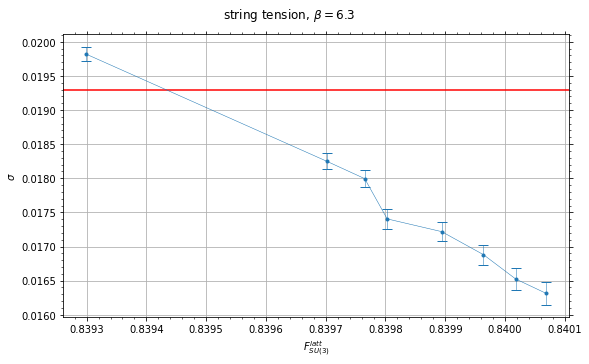

../../images/potential/abelian_dominance/string_tension/su3/gluodynamics/potential_abelian_mag_36^4_beta6p3


In [6]:
# string tension dependence on MAG fixation
show_plot = True
x_name = 'functional'
hue = None
y_name = 'sigma'
err_name = 'sigma_err'
groupby = []
beta1 = 'beta6p3'
beta = 6.3
r_max = 18
T_max = 18
path = f'/home/ilya/soft/lattice/observables/result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/36^4/beta6.3'
constraints = {'r/a': (1, r_max), 'T': (1, T_max)}
sa_steps = ['steps_0/copies=1', 'steps_2/copies=1', 'steps_10/copies=1', 'steps_25/copies=4', 'steps_50/copies=4',
            'steps_100/copies=4', 'steps_200/copies=4', 'steps_500/copies=4']
sa_short = ['0_1', '2_1', '10_1', '25_4', '50_4', '100_4', '200_4', '500_4']
paths = []
# for sa in sa_steps:
for i in range(len(sa_steps)):
    path1 = {'path' : f'{path}/HYP0_APE_alpha=0.5/{sa_steps[i]}/potential_abelian.csv', 'parameters': {'mag_step': sa_short[i]}, 'constraints': {'T': (11, 11)}}
    paths.append(path1)
r0 = scaler.get_r0(beta)
fit_range = (4, r_max)
y_lims = (-1, 8)
# remove_from_plot = ['monopole', 'monopoless']
remove_from_plot = []
make_sum = True
image_path = f'../../images/potential/abelian_dominance/string_tension/su3/gluodynamics'
image_name = f'potential_abelian_mag_36^4_beta6p3'
data = potential_data.get_potantial_data(paths)
fit_names = ['c', 'sigma']
fits = data.groupby(['mag_step']).apply(fit.make_fit, fit_range, fit.func_linear, fit_names, 'r/a', 'aV(r)', err_col='err').reset_index()
fits = fits.sort_values(by=['mag_step'])
path_functional = '../../data/mag/functional/su3/gluodynamics/36^4/beta6.3'
paths_functional = [(f'{path_functional}/steps_0/copies=1', '0_1', 0.5), (f'{path_functional}/steps_2/copies=1', '2_1', 2),
         (f'{path_functional}/steps_10/copies=1', '10_1', 10), (f'{path_functional}/steps_25/copies=4', '25_4', 25),
         (f'{path_functional}/steps_50/copies=4', '50_4', 50), (f'{path_functional}/steps_100/copies=4', '100_4', 100),
         (f'{path_functional}/steps_200/copies=4', '200_4', 200), (f'{path_functional}/steps_500/copies=4', '500_4', 500)]
data_functional = mag.read_functional(paths_functional, 1, 5000, True, 4)
data_functional['copy'] = data_functional['copy'].apply(pd.to_numeric)
data_functional = mag.functional_average_max(data_functional)
fits = fits.merge(data_functional, left_on='mag_step', right_on='type')
fits = fits.sort_values(by=['functional'])
fits['type'] = 'abelian'
# fits = fits['']
path_su3 = [{'path' : f'{path}/HYP0_APE_alpha=0.5/potential_original.csv', 'constraints': {'T': (8, 8)}}]
data_su3 = potential_data.get_potantial_data(path_su3)
data_su3 = fit.make_fit(data_su3, (3, 12), fit.func_quark_potential, ['c', 'alpha', 'sigma'], 'r/a', 'aV(r)', err_col='err')
# data_su3 = fit.make_fit(data_su3, (6, 12), fit.func_linear, ['c', 'sigma'], 'r/a', 'aV(r)', err_col='err')
print(data_su3)
plots.make_plots_single(fits, x_name, y_name, None, groupby, r'$F_{SU(3)}^{latt}$', r'$\sigma$', r'string tension, $\beta=6.3$', image_path, image_name, show_plot, err=err_name, black_line_y=data_su3.loc[:,'sigma'].iloc[0])

In [10]:
path = f'/home/ilya/soft/lattice/observables/result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0'
path_su3 = [{'path' : f'{path}/HYP0_APE_alpha=0.5/potential_original.csv', 'constraints': {'T': (8, 8)}}]
data_su3 = potential_data.get_potantial_data(path_su3)
print(data_su3)
fit_range = (3, 12)
data_su3 = fit.make_fit(data_su3, fit_range, fit.func_quark_potential, ['c', 'alpha', 'sigma'], 'r/a', 'aV(r)', err_col='err')
print(data_su3)
print(data_su3.loc[:,'sigma'].iloc[0])

    T  r/a     aV(r)       err
0   8    1  0.411212  0.000110
1   8    2  0.596925  0.000662
2   8    3  0.699895  0.001796
3   8    4  0.772640  0.003808
4   8    5  0.852551  0.007614
5   8    6  0.895444  0.013775
6   8    7  0.944188  0.025260
7   8    8  0.989436  0.043320
8   8    9  1.031040  0.076428
9   8   10  1.104395  0.119318
10  8   11  1.287170  0.253791
11  8   12  1.540675  0.531584
          c     c_err     alpha  alpha_err    sigma  sigma_err    chi_sq
0  0.668838  0.059439 -0.338146   0.114068  0.04786   0.007377  0.101934
0.0478599800379338


In [2]:
beta1 = 'beta6p0'
beta = 6.0
r_max = 12
T_max = 12
path = f'/home/ilya/soft/lattice/observables/result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0'
constraints = {'r/a': (1, r_max), 'T': (1, T_max)}
sa_steps = ['steps_0/copies=1', 'steps_2/copies=1', 'steps_10/copies=1', 'steps_25/copies=4', 'steps_50/copies=4',
            'steps_100/copies=4', 'steps_200/copies=4', 'steps_500/copies=4', 'steps_1000/copies=4', 'steps_2000/copies=4']
sa_short = ['0_1', '2_1', '10_1', '25_4', '50_4', '100_4', '200_4', '500_4', '1000_4', '2000_4']
paths = []
# for sa in sa_steps:
for i in range(len(sa_steps)):
    path1 = {'original': {'name' : 'SU3', 'path' : f'{path}/HYP0_APE_alpha=0.5/potential_original.csv', 'constraints': constraints},
            'monopole': {'name' : f'abelian_{sa_short[i]}', 'path' : f'{path}/HYP0_APE_alpha=0.5/{sa_steps[i]}/potential_abelian.csv', 'T' : 11, 'constraints': constraints}}
    paths.append(path1)
r0 = scaler.get_r0(beta)
fit_range = (2, r_max)
y_lims = (-1, 8)
# remove_from_plot = ['monopole', 'monopoless']
remove_from_plot = []
make_sum = True
data_decomposition = decomposition.potential_decomposition_mag_dependence_shift(paths, f'../../images/potential/decomposition/su3/gluodynamics/',
                                                                                f'potential_decomposition_mag', y_lims, False, r0, fit_range, remove_from_plot, make_sum, 'original', 'abelian', (6, 12), (4, 12))
plots.plot_potential_single(data_decomposition, 'r/a', 'aV(r)', 'matrix_type', f'../../images/potential/decomposition/su3/gluodynamics/', f'potential_decomposition_mag_abelian', True, err='err')

['SU3', 'mon_0_1']
         r/a     aV(r)       err matrix_type
0   0.186299  2.206182  0.000183         SU3
1   0.372599  3.202208  0.000467         SU3
2   0.558898  3.749734  0.002156         SU3
3   0.745198  4.152089  0.000882         SU3
4   0.931497  4.488181  0.005433         SU3
5   1.117797  4.799871  0.002067         SU3
6   1.304096  5.089442  0.008450         SU3
7   1.490396  5.373003  0.004799         SU3
8   1.676695  5.664004  0.017388         SU3
9   1.862994  5.914864  0.063253         SU3
10  2.049294  6.136972  0.058887         SU3
11  2.235593  6.427977  0.081916         SU3
0   0.186299  0.881624  0.000167     mon_0_1
1   0.372599  1.316429  0.000469     mon_0_1
2   0.558898  1.621176  0.000924     mon_0_1
3   0.745198  1.889861  0.001700     mon_0_1
4   0.931497  2.149565  0.003076     mon_0_1
5   1.117797  2.398867  0.005566     mon_0_1
6   1.304096  2.642777  0.009887     mon_0_1
7   1.490396  2.926003  0.017523     mon_0_1
8   1.676695  3.137330  0.029855    

KeyError: 'aV(r)_original'

In [2]:
constraints = {'r/a': (1, 12), 'T': (1, 12)}
path = f'/home/ilya/soft/lattice/observables/result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0'
paths = {'original': {'path' : f'{path}/HYP0_APE_alpha=0.5/potential_original.csv', 'parameters': {'name' : 'SU3'}, 'constraints': constraints},
        'abelian': {'path' : f'{path}/HYP0_APE_alpha=0.5/steps_500/copies=4/potential_abelian.csv', 'parameters': {'name' : 'abelian', 'mag_step': '500_4'}, 'T' : 11, 'constraints': constraints}}

data = potential_data.DataDecomposition(paths)
print(data.data)


[      T  r/a     aV(r)       err name potential_type
0     1    1  0.416441  0.000012  SU3       original
1     2    1  0.412799  0.000015  SU3       original
2     3    1  0.411634  0.000020  SU3       original
3     4    1  0.411217  0.000026  SU3       original
4     5    1  0.411054  0.000036  SU3       original
..   ..  ...       ...       ...  ...            ...
127   7   12  1.086793  0.114585  SU3       original
128   8   12  1.540675  0.531584  SU3       original
129   9   12 -0.087980  0.628578  SU3       original
130  10   12  0.238534  0.680611  SU3       original
131  11   12  0.000000  0.000000  SU3       original

[132 rows x 6 columns],       T  r/a     aV(r)       err     name mag_step potential_type
0     1    1  0.160014  0.000014  abelian    500_4        abelian
1     2    1  0.160993  0.000015  abelian    500_4        abelian
2     3    1  0.161108  0.000016  abelian    500_4        abelian
3     4    1  0.161104  0.000017  abelian    500_4        abelian
4     5 